## Import Library

In [1]:
# Python import library
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# import process_data as pcs
# Self_define import file
from control import get_all_trial_seperate

## Get All Data

In [13]:
cumu_data = get_all_trial_seperate('302')

35
Finish getting data for: p1
38
Finish getting data for: p2
60
Finish getting data for: nw1
33
Finish getting data for: nw2


/Users/tongyun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


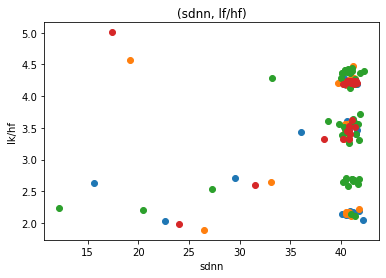

In [14]:
# print(type(cumu_data['sdnn']))
fig1 = plt.figure(1)
ax1 = fig1.gca()
plt.title('(sdnn, lf/hf)')
plt.xlabel('sdnn')
plt.ylabel('lk/hf')
# X-axis is sdnn value, Y-axis is lfhf value
plt.scatter(cumu_data['302']['p1']['sdnn'] ,cumu_data['302']['p1']['lfhf'] )
plt.scatter(cumu_data['302']['p2']['sdnn'] ,cumu_data['302']['p2']['lfhf'] )
plt.scatter(cumu_data['302']['nw1']['sdnn'] ,cumu_data['302']['nw1']['lfhf'] )
plt.scatter(cumu_data['302']['nw2']['sdnn'] ,cumu_data['302']['nw2']['lfhf'] )
fig1.show()

## K-Mean Clutering

In [15]:
sd_fq_array = cumu_data['302']['p1']['sd_lf']
# print(sd_fq_array)
sd_fq_array = np.vstack((sd_fq_array,cumu_data['302']['p2']['sd_lf']))
sd_fq_array = np.vstack((sd_fq_array,cumu_data['302']['nw1']['sd_lf']))
sd_fq_array = np.vstack((sd_fq_array,cumu_data['302']['nw2']['sd_lf']))
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(sd_fq_array)

### Remove Outliner

In [16]:
if len(sd_fq_array[y_km == 0]) > len(sd_fq_array[y_km == 1]):
    sd_fq_array = sd_fq_array[y_km == 0]
else:
    sd_fq_array = sd_fq_array[y_km == 1]
        
km2 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km2 = km2.fit_predict(sd_fq_array)

if len(sd_fq_array[y_km2 == 0]) > len(sd_fq_array[y_km2 == 1]):
    sd_fq_array = sd_fq_array[y_km2 == 0]
else:
    sd_fq_array = sd_fq_array[y_km2 == 1]
        
km3 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km3 = km3.fit_predict(sd_fq_array)

### Visualize clutering

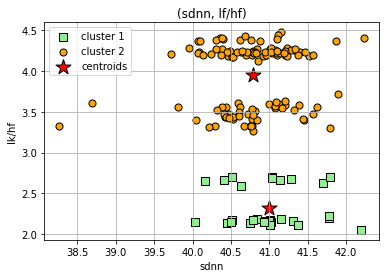

In [17]:
# plot the 2 clusters
plt.scatter(
    sd_fq_array[y_km3 == 0, 0], sd_fq_array[y_km3 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    sd_fq_array[y_km3 == 1, 0], sd_fq_array[y_km3 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


# plot the centroids
plt.scatter(
    km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title('(sdnn, lf/hf)')
plt.xlabel('sdnn')
plt.ylabel('lk/hf')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Categorize clutered data by trial

In [18]:
'''

'''
trial = 'nw1'
dict_3d = cumu_data['302']['p1']['3d_dict'] 
dict_3d.update( cumu_data['302']['p2']['3d_dict'] )
dict_3d.update(cumu_data['302']['nw1']['3d_dict'] )
dict_3d.update(cumu_data['302']['nw2']['3d_dict'] )
'''
First Cluster data
'''
cluster1_z = {'p1':[],'p2':[],'nw1':[], 'nw2':[]}
length1 = len(sd_fq_array[y_km3 == 0, 0]) 
Y1 = np.zeros(shape=(length1,3))
pre_idx = dict_3d[( sd_fq_array[y_km3 == 0, 0][0], sd_fq_array[y_km3 == 0, 1][0])]
count = 0
for i in range( length1 ):
    (trial,idx) = dict_3d[( sd_fq_array[y_km3 == 0, 0][i], sd_fq_array[y_km3 == 0, 1][i])]
    Y1[i] = [sd_fq_array[y_km3 == 0, 0][i], sd_fq_array[y_km3 == 0, 1][i] ,idx]
    cluster1_z[trial].append(idx)
# Print m
print('Data in cluter 1, categorized by trial:__________________')
print(cluster1_z)
'''
Second Cluster data
'''
cluster2_z = {'p1':[],'p2':[],'nw1':[], 'nw2':[]}
trial = 'nw1'
length2 = len(sd_fq_array[y_km3 == 1, 0]) 
Y2 = np.zeros(shape=(length2,3))
pre_idx = dict_3d[( sd_fq_array[y_km3 == 1, 0][0], sd_fq_array[y_km3 == 1, 1][0])]
count = 0
for i in range( length2 ):
    (trial,idx) = dict_3d[( sd_fq_array[y_km3 == 1, 0][i], sd_fq_array[y_km3 == 1, 1][i])]
    Y2[i] = [sd_fq_array[y_km3 == 1, 0][i], sd_fq_array[y_km3 == 1, 1][i],idx ]
    cluster2_z[trial].append(idx)
# Print Message
print('Data in cluter 2, categorized by trial:__________________')
print(cluster2_z)

{'p1': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28], 'p2': [17, 18, 19, 20, 21], 'nw1': [33, 34, 35, 36, 37, 47, 48, 50, 51, 52, 53, 54], 'nw2': []}
{'p1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 27, 29], 'p2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 'nw1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49], 'nw2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]}


## 3D Visualization

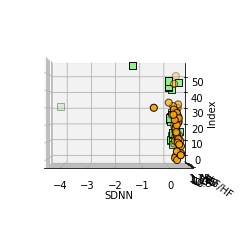

In [9]:
ax = plt.axes(projection='3d')

# Set axis label
ax.set_xlabel('SDNN')
ax.set_ylabel('LF/HF')
ax.set_zlabel('Index')

# Data for three-dimensional scattered points
ax.scatter3D(Y1[:, 0], Y1[:, 1], Y1[:, 2], s=50, 
    marker='s', edgecolor='black',c='lightgreen',
    label='cluster 1')

ax.scatter3D(Y2[:, 0], Y2[:, 1], Y2[:, 2], s=50, 
    marker='o', edgecolor='black',c='orange',
    label='cluster 2')

# Modify following function to rotate
ax.view_init(0, 270)

## Visualize in each trial

35


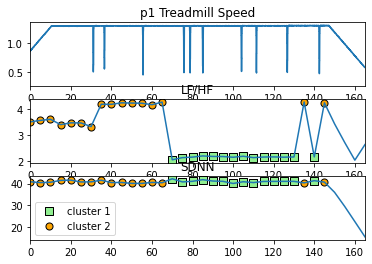

38


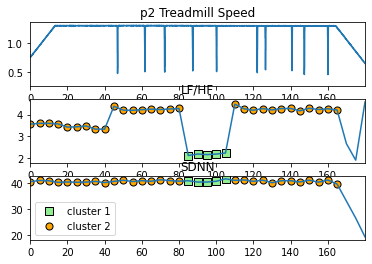

60


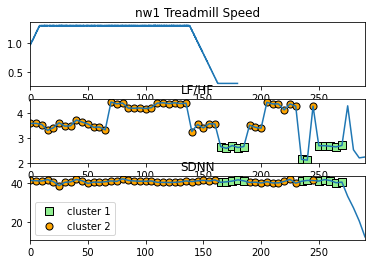

33


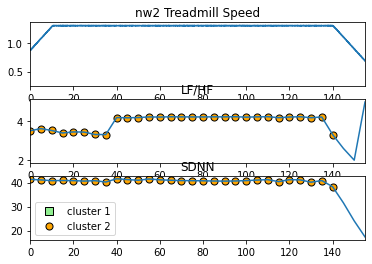

In [19]:
i = 0 #67410
f = 134820
ii= 17500
ff= 32500

def plotT(participant, trial):
    treadmill_data = cumu_data[participant][trial]['treadMill']
#     print(treadmill_data.keys)
    lfhf_list = cumu_data[participant][trial]['lfhf']
    sdnn_list = cumu_data[participant][trial]['sdnn']
    intervals = cumu_data[participant][trial]['interval']
    
    num_figures = 3
    plt.figure()
    plt.title(trial)
    scale = [i[0]/1925.9258 for i in intervals[0:-1]]
    # TreadMill
    plt.subplot(num_figures,1,1)
    plt.title(trial +' Treadmill Speed')
    plt.plot(treadmill_data.time, treadmill_data.Speed)
    
    plt.xlim(0,scale[-1])
    # LF/HF
    plt.subplot(num_figures,1,2)
    plt.title('LF/HF')
    length = len(intervals)
    print(length)
    #scale = [15+i[0]/1910 for i in intervals[0:-1]]
    
    # scale = [i[0]/3500 for i in intervals[0:-1]]
    #plt.plot(lf_hf_store,'*')
    plt.plot(scale, lfhf_list)

    # First cluster in lfhf
    scale1 = [scale[i] for i in cluster1_z[trial]]
    lfhf1 = [lfhf_list[i] for i in cluster1_z[trial]]
    plt.scatter(
        scale1, lfhf1,
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    # Second cluster in lfhf
    scale2 = [scale[i] for i in cluster2_z[trial]]
    lfhf2 = [lfhf_list[i] for i in cluster2_z[trial]]
    plt.scatter(
        scale2, lfhf2,
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    plt.xlim(0,scale[-1])
#     plt.xlim(0,160)
    # SDNN
    plt.subplot(num_figures,1,3)
    plt.title('SDNN')
    plt.plot(scale, sdnn_list)
    # First cluster in sdnn
    scale1 = [scale[i] for i in cluster1_z[trial]]
    sdnn1 = [sdnn_list[i] for i in cluster1_z[trial]]
    plt.scatter(
        scale1, sdnn1,
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )
    
    # Second cluster in sdnn
    scale2 = [scale[i] for i in cluster2_z[trial]]
    sdnn2 = [sdnn_list[i] for i in cluster2_z[trial]]
    plt.scatter(
        scale2, sdnn2,
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    plt.xlim(0,scale[-1])
#     plt.xlim(0,160)
    plt.legend()
    
    plt.show()
    
plotT('302','p1')
plotT('302','p2')
plotT('302','nw1')
plotT('302','nw2')


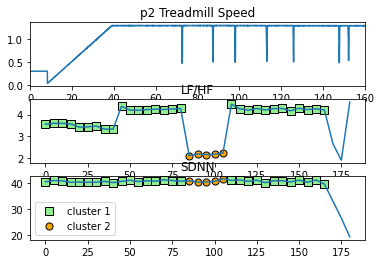

In [13]:
plotT('302','p2')